In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/coffee_test_annotations.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/coffee_test_annotations.zip
  inflating: coffee_test_annotations/085931.jpg  
  inflating: coffee_test_annotations/085931.json  
  inflating: coffee_test_annotations/085947.jpg  
  inflating: coffee_test_annotations/085947.json  
  inflating: coffee_test_annotations/090032.jpg  
  inflating: coffee_test_annotations/090032.json  
  inflating: coffee_test_annotations/090104.jpg  
  inflating: coffee_test_annotations/090104.json  
  inflating: coffee_test_annotations/090116.jpg  
  inflating: coffee_test_annotations/090116.json  
  inflating: coffee_test_annotations/090130.jpg  
  inflating: coffee_test_annotations/090130.json  
  inflating: coffee_test_annotations/090139.jpg  
  inflating: coffee_test_annotations/090139.json  
  inflating: coffee_test_annotations/090142.jpg  
  inflating: coffee_test_annotations/090142.json  
  inflating: coffee_test_annotations/090331.jpg  
  inflating: coffee_test_annotations/090331.json  
  in

In [ ]:
# import packages required
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
import os
import glob
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [ ]:
if not os.path.exists("lara2018"):
  !git clone https://github.com/esgario/lara2018.git

In [ ]:
# Define Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128

Y_train_data_path = "/content/coffee_test_annotations"
Y_test_data_path = "/content/lara2018/segmentation/dataset/annotations/test"
X_train_data_path = "/content/lara2018/segmentation/dataset/images/train"
X_test_data_path = "/content/lara2018/segmentation/dataset/images/test"

In [ ]:
# getting all paths for training and testing
x_train_path_list = sorted(glob.glob(X_train_data_path+"/*." + 'jpg'))
x_test_path_list = sorted(glob.glob(X_test_data_path+"/*." + 'jpg'))
y_train_path_list = sorted(glob.glob(Y_train_data_path+"/*." + 'jpg'))
y_test_path_list = sorted(glob.glob(Y_test_data_path+"/*." + 'png'))
# print(x_train_path_list)
# # print(y_train_path_list)
# print()

In [ ]:
# check if the paths are correctly loaded
assert len(x_train_path_list) > 0
assert len(x_test_path_list) > 0
assert len(y_train_path_list) > 0
assert len(y_test_path_list) > 0

In [ ]:
def pre_processing(x_train_path_list, y_train_path_list):
  Y = []
  X = []
  for x_train_path, y_train_path in tqdm(zip(x_train_path_list, y_train_path_list), total = len(x_train_path_list)):
    # Load the image and the ground truth segmentation
    # y_train_path = "/content/lara2018/segmentation/dataset/annotations/test/" + x_train_path.split("/")[-1].split(".")[0] + '_mask.png'
    # mask_path =
    img = cv2.imread(x_train_path)
    gt = cv2.imread(y_train_path, cv2.IMREAD_GRAYSCALE)

    if(img is None or gt is None):
      print(img)
      print(gt)
      continue

    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    gt = cv2.resize(gt, (IMG_HEIGHT, IMG_WIDTH))

    # Convert the image to Lab color space
    # lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab = img

    # Reshape the Lab image to a 2D array of pixels
    pixels = lab.reshape((-1, 3))

    X.append(pixels)
    Y.append(gt)

  return np.array(X), np.array(Y)


In [ ]:
x_train, y_train = pre_processing(x_train_path_list, y_train_path_list)

 13%|█▎        | 51/400 [00:08<01:01,  5.67it/s]


(148, 148, 1)
(321, 1, 2)
(128, 128, 3)


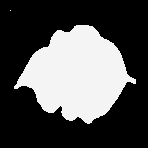

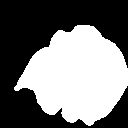

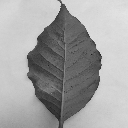

(148, 148, 1)
(302, 1, 2)
(128, 128, 3)


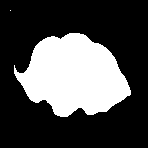

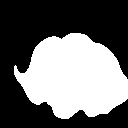

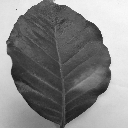

(148, 148, 1)
(308, 1, 2)
(128, 128, 3)


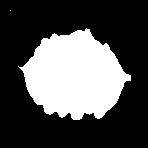

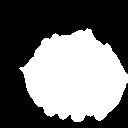

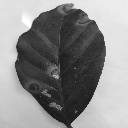

(148, 148, 1)
(320, 1, 2)
(128, 128, 3)


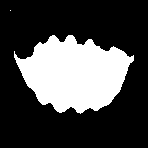

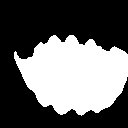

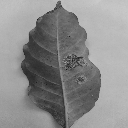

(148, 148, 1)
(284, 1, 2)
(128, 128, 3)


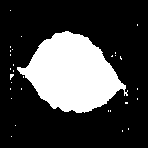

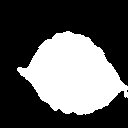

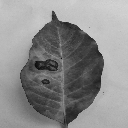

(148, 148, 1)
(276, 1, 2)
(128, 128, 3)


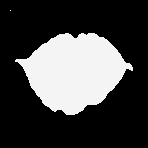

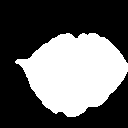

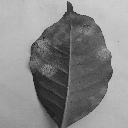

(148, 148, 1)
(279, 1, 2)
(128, 128, 3)


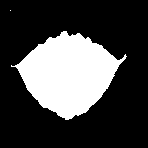

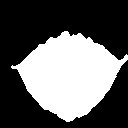

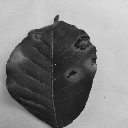

(148, 148, 1)
(297, 1, 2)
(128, 128, 3)


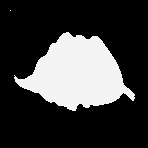

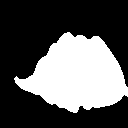

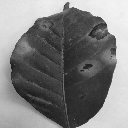

(148, 148, 1)
(305, 1, 2)
(128, 128, 3)


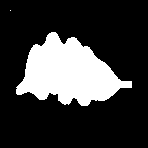

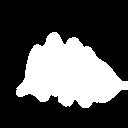

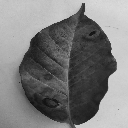

(148, 148, 1)
(291, 1, 2)
(128, 128, 3)


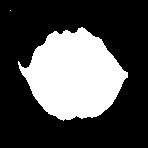

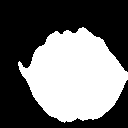

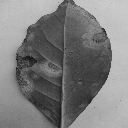

(148, 148, 1)
(272, 1, 2)
(128, 128, 3)


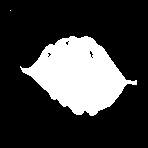

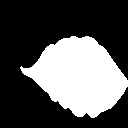

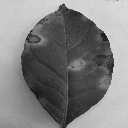

(148, 148, 1)
(283, 1, 2)
(128, 128, 3)


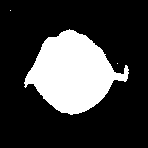

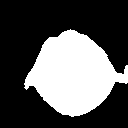

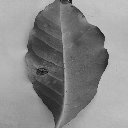

(148, 148, 1)
(306, 1, 2)
(128, 128, 3)


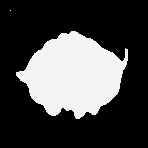

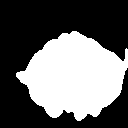

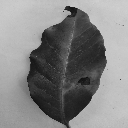

(148, 148, 1)
(302, 1, 2)
(128, 128, 3)


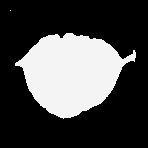

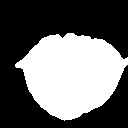

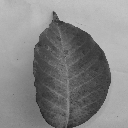

(148, 148, 1)
(335, 1, 2)
(128, 128, 3)


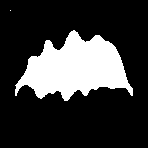

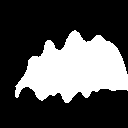

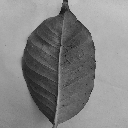

(148, 148, 1)
(317, 1, 2)
(128, 128, 3)


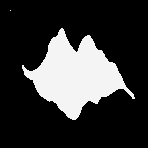

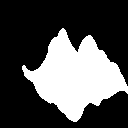

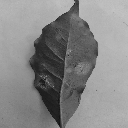

(148, 148, 1)
(314, 1, 2)
(128, 128, 3)


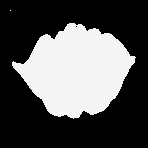

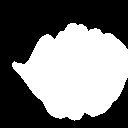

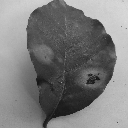

(148, 148, 1)
(307, 1, 2)
(128, 128, 3)


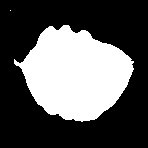

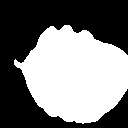

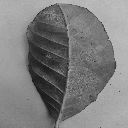

(148, 148, 1)
(280, 1, 2)
(128, 128, 3)


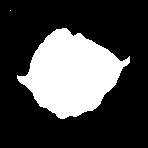

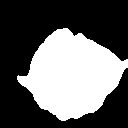

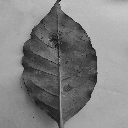

(148, 148, 1)
(294, 1, 2)
(128, 128, 3)


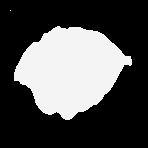

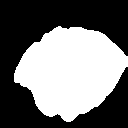

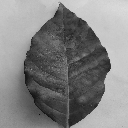

(148, 148, 1)
(295, 1, 2)
(128, 128, 3)


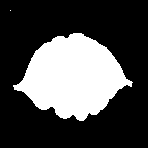

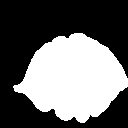

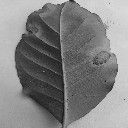

(148, 148, 1)
(312, 1, 2)
(128, 128, 3)


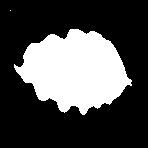

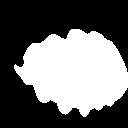

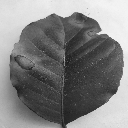

(148, 148, 1)
(282, 1, 2)
(128, 128, 3)


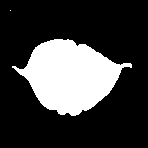

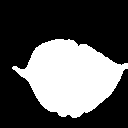

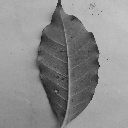

(148, 148, 1)
(289, 1, 2)
(128, 128, 3)


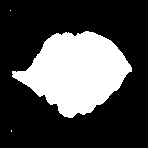

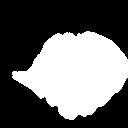

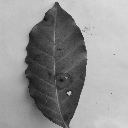

(148, 148, 1)
(279, 1, 2)
(128, 128, 3)


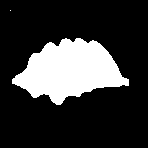

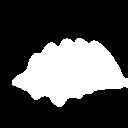

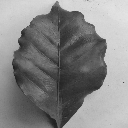

(148, 148, 1)
(319, 1, 2)
(128, 128, 3)


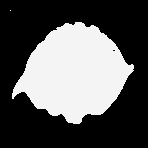

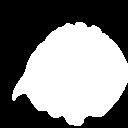

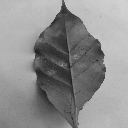

(148, 148, 1)
(320, 1, 2)
(128, 128, 3)


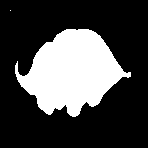

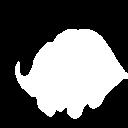

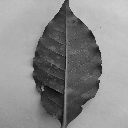

(148, 148, 1)
(298, 1, 2)
(128, 128, 3)


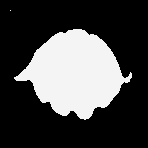

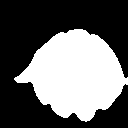

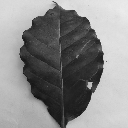

(148, 148, 1)
(315, 1, 2)
(128, 128, 3)


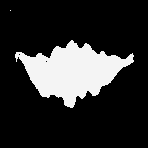

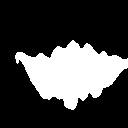

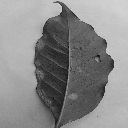

(148, 148, 1)
(312, 1, 2)
(128, 128, 3)


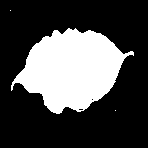

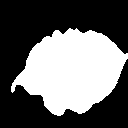

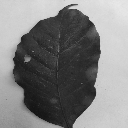

(148, 148, 1)
(321, 1, 2)
(128, 128, 3)


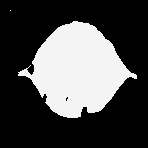

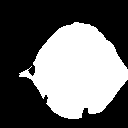

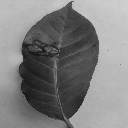

(148, 148, 1)
(304, 1, 2)
(128, 128, 3)


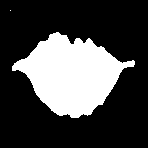

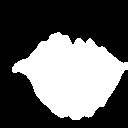

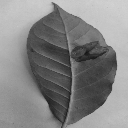

(148, 148, 1)
(274, 1, 2)
(128, 128, 3)


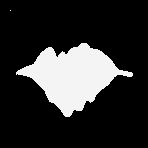

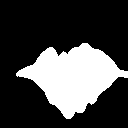

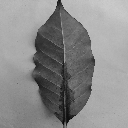

(148, 148, 1)
(316, 1, 2)
(128, 128, 3)


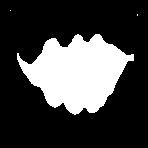

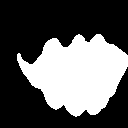

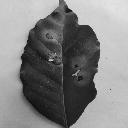

(148, 148, 1)
(288, 1, 2)
(128, 128, 3)


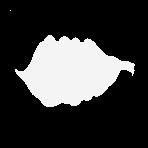

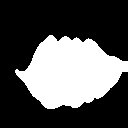

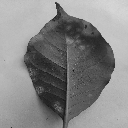

(148, 148, 1)
(318, 1, 2)
(128, 128, 3)


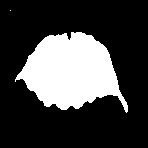

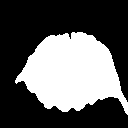

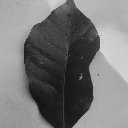

(148, 148, 1)
(305, 1, 2)
(128, 128, 3)


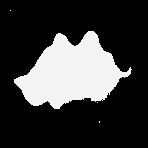

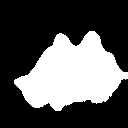

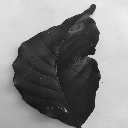

(148, 148, 1)
(282, 1, 2)
(128, 128, 3)


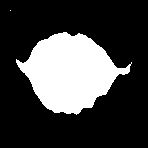

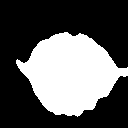

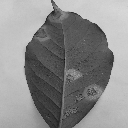

(148, 148, 1)
(267, 1, 2)
(128, 128, 3)


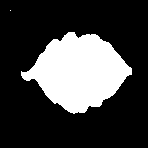

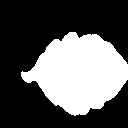

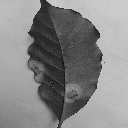

(148, 148, 1)
(272, 1, 2)
(128, 128, 3)


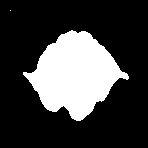

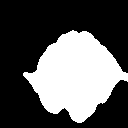

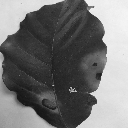

(148, 148, 1)
(283, 1, 2)
(128, 128, 3)


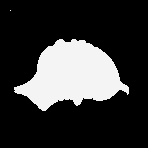

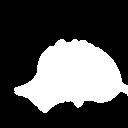

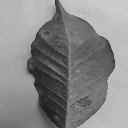

(148, 148, 1)
(462, 1, 2)
(128, 128, 3)


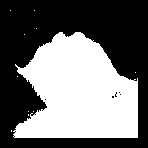

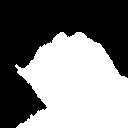

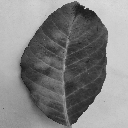

(148, 148, 1)
(297, 1, 2)
(128, 128, 3)


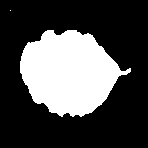

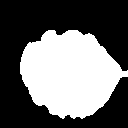

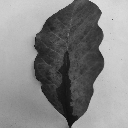

(148, 148, 1)
(271, 1, 2)
(128, 128, 3)


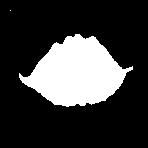

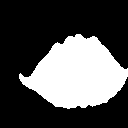

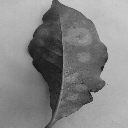

(148, 148, 1)
(326, 1, 2)
(128, 128, 3)


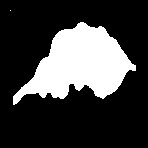

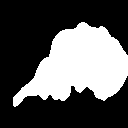

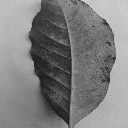

(148, 148, 1)
(295, 1, 2)
(128, 128, 3)


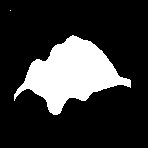

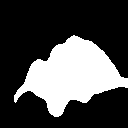

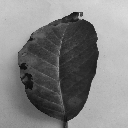

(148, 148, 1)
(284, 1, 2)
(128, 128, 3)


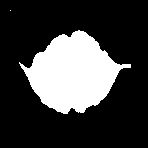

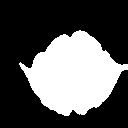

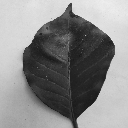

(148, 148, 1)
(319, 1, 2)
(128, 128, 3)


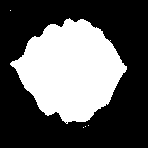

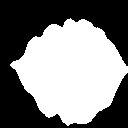

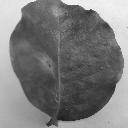

(148, 148, 1)
(269, 1, 2)
(128, 128, 3)


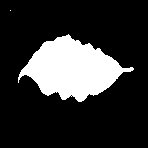

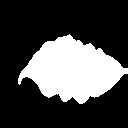

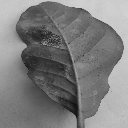

(148, 148, 1)
(309, 1, 2)
(128, 128, 3)


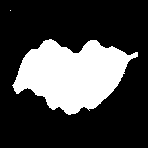

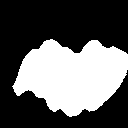

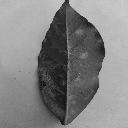

(148, 148, 1)
(325, 1, 2)
(128, 128, 3)


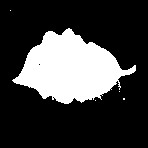

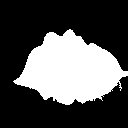

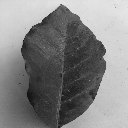

In [ ]:
def dbscan(pixels):
  from sklearn.cluster import DBSCAN
  # Use DBSCAN clustering to cluster the pixels
  deb = True
  dbscan = DBSCAN(eps=7, min_samples=50)
  labels = dbscan.fit_predict(pixels)
  # labels = np.logical_not(labels).astype(labels.dtype)
  return labels

def agglomerative_clustering(pixels):
  from sklearn.cluster import AgglomerativeClustering
  # Use Hierarchical Agglomerative Clustering (HAC) to cluster the pixels
  hac = AgglomerativeClustering(n_clusters=2, linkage='ward')
  labels = hac.fit_predict(pixels)
  return labels

def gmm_cluster(pixels):
  from sklearn.mixture import GaussianMixture
  # Use Gaussian Mixture Models (GMM) to cluster the pixels
  gmm = GaussianMixture(n_components=2)
  labels = gmm.fit_predict(pixels)
  return labels

for x, y in zip(x_train, y_train):
  x[0] = [0, 0, 0]
  a = gmm_cluster(x)
  a = a.reshape(128, 128, -1)*255
  # a = np.pad(a, 1, mode='constant', constant_values=255)
  temp = a[0][0]
  if(temp < 200):
    a = np.where(a == 0, 244, a)
    a = np.where(a == 255, 0, a)

  for i in range(10):
    a = np.pad(a, pad_width=((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

  print(a.shape)

  # Find the contours in the inverted mask
  contours, hierarchy = cv2.findContours(a, 4, 1)

  points = np.concatenate((contours),)
  # img_with_contours = cv2.drawContours(a, contours, -1, (0, 255, 0), 2)
  points = contours[0]
  for i in contours:
    if(len(i) > len(points)): points = i

  print(points.shape)
  points = points + 1

  filled_segmentation = np.zeros((IMG_HEIGHT, IMG_WIDTH,3))
  # print(filled_segmentation.shape)
  filled_segmentation = cv2.fillPoly(filled_segmentation, [np.int32(points)], [255,255,255])
  # x = cv2.polylines(x, i, True, color=(128, 0, 200),
  # thickness=3,)
  print(filled_segmentation.shape)
  cv2_imshow(a)
  cv2_imshow(filled_segmentation)

  # Invert the filled mask again to obtain the filled segmentation
  # filled_segmentation = cv2.bitwise_not(filled_mask)

  # cv2_imshow(filled_segmentation)
  cv2_imshow(y)


In [ ]:

def post_processing(labels, gt):
  global IMG_HEIGHT, IMG_WIDTH
  # Reshape the label array back into an image
  mask = labels.reshape((IMG_HEIGHT, IMG_WIDTH))

  # Create a binary mask of the ground truth segmentation
  gt_mask = cv2.threshold(gt, 2, 255, cv2.THRESH_BINARY)[1]
  seg_mask = np.abs(mask - 1) * 255
  # seg_mask[seg_mask == 0] = 150

  return seg_mask, gt_mask



In [ ]:
def dice_coefficient(img, mask):
  intersection = np.logical_and(mask, img)
  dice_coefficient = (510.0 * intersection.sum()) / (mask.sum() + img.sum())

  # Display the result
  return  dice_coefficient





In [ ]:
x_train, y_train = pre_processing(y_train_path_list, y_train_path_list )
assert len(x_train) > 0 and len(y_train) > 0

100%|██████████| 51/51 [00:21<00:00,  2.41it/s]


In [ ]:
x_test, y_test = pre_processing(x_test_path_list, y_test_path_list )
assert len(x_test) > 0 and len(y_test) > 0

100%|██████████| 50/50 [00:02<00:00, 21.93it/s]


In [ ]:
agglom = 0
db_scan = 0
gmm = 0
for pixels, gt in tqdm(zip(x_train, y_train), total = y_train.shape[0]):
  pixels, gt = x_train[0], y_train[0]
  labels = agglomerative_clustering(pixels)
  seg, gt = post_processing(labels, gt)
  agglom += dice_coefficient(seg, gt)

  labels = dbscan(pixels)
  seg, gt = post_processing(labels, gt)
  db_scan += dice_coefficient(seg, gt)

  labels = gmm_cluster(pixels)
  seg, gt = post_processing(labels, gt)
  gmm += dice_coefficient(seg, gt)

print("Dice coefficient of agglomerative_clustering is: ", agglom/x_test.shape[0]*100)
print("Dice coefficient of DBSCAN is: ", db_scan/x_test.shape[0]*100)
print("Dice coefficient of GMM is: ", gmm/x_test.shape[0]*100)

100%|██████████| 51/51 [11:49<00:00, 13.92s/it]

Dice coefficient of agglomerative_clustering is:  80.7575221238938
Dice coefficient of DBSCAN is:  81.08441325982675
Dice coefficient of GMM is:  73.43219622107851
